**Michael Labbe** <br>
**05/24/2023** <br>
**Homework 1**

**1. Import the necessary libraries and establish a connection to the IMDb movie database** <br>

In [5]:
# Import necessary libraries
import pandas as pd  # Used for data manipulation and analysis
from sqlalchemy import create_engine  # Used for creating a connection to a database using SQLAlchemy
import keyring  # Used for storing passwords and other sensitive information

# Get password from keyring using keyring module
keyring.get_keyring()  # Load keyring
password = keyring.get_password("database", "student")  # Get password for username "student" from "database" keyring

# Define PostgreSQL database connection parameters
user = "student"
host = "postgres-database.chlsqnrqiao3.us-east-1.rds.amazonaws.com"
dbname = "imdb"
port = "5432"

# Create a SQLAlchemy engine URI
db_URI = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}"

**2. Write an SQL query to retrieve the first ten (10) rows of data from the imdb.title_basics table. Load the results into a Pandas dataframe and display the output in your Jupyter Notebook.**

In [6]:
df = pd.read_sql("""SELECT * FROM IMDB.TITLE_BASICS LIMIT 10""", db_URI)
df

,tconst,titletype,primarytitle,originaltitle,startyear,endyear,runtimeminutes
0,tt0000001,short,Carmencita,Carmencita,1894,None,1
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,None,5
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,1892,None,4
3,tt0000004,short,Un bon bock,Un bon bock,1892,None,12
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,None,1
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,1894,None,1
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,1894,None,1
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,1894,None,1
8,tt0000009,movie,Miss Jerry,Miss Jerry,1894,None,45
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,1895,None,1


**3. Write an SQL query to retrieve only the columns tconst, primarytitle, startyear, and runtimeminutes from the imdb.title_basics table for your favorite movie.**

In [7]:
df = pd.read_sql("""SELECT TCONST, PRIMARYTITLE, STARTYEAR, RUNTIMEMINUTES FROM IMDB.TITLE_BASICS WHERE PRIMARYTITLE = 'Braveheart' and STARTYEAR = 1995""", db_URI)
movie_ID = df.iloc[0]['tconst']
df

,tconst,primarytitle,startyear,runtimeminutes
0,tt0112573,Braveheart,1995,178


**4. Enhance the SQL query from Question Three to retrieve the averagerating and numvotes columns from the imdb.title_ratings table for your favorite movie.**

In [8]:
df = pd.read_sql("""SELECT TB.TCONST, TB.PRIMARYTITLE, TB.STARTYEAR, TB.RUNTIMEMINUTES, TR.AVERAGERATING, TR.NUMVOTES FROM IMDB.TITLE_BASICS TB INNER JOIN IMDB.TITLE_RATINGS TR ON TR.TCONST = TB.TCONST WHERE TB.PRIMARYTITLE = 'Braveheart' and TB.STARTYEAR = 1995""", db_URI)
df

,tconst,primarytitle,startyear,runtimeminutes,averagerating,numvotes
0,tt0112573,Braveheart,1995,178,8.4,1050526


**5. Write a SQL to identify the genre (or combination of genres) from your favorite movie, then copy your query from Question Four and modify it to return all movies that match that genre(s) of your favorite movie.**

In [9]:
df = pd.read_sql("""SELECT TB.TCONST, TB.PRIMARYTITLE, TG.GENRE FROM IMDB.TITLE_BASICS TB INNER JOIN IMDB.TITLE_GENRES TG ON TG.TCONST = TB.TCONST WHERE TB.PRIMARYTITLE = 'Braveheart' and TB.STARTYEAR = 1995""", db_URI)
df

,tconst,primarytitle,genre
0,tt0112573,Braveheart,Biography
1,tt0112573,Braveheart,Drama
2,tt0112573,Braveheart,History


In [10]:
df = pd.read_sql("""SELECT TB.TCONST, TB.PRIMARYTITLE, TB.STARTYEAR, TB.RUNTIMEMINUTES, TR.AVERAGERATING, TR.NUMVOTES, g1.genre as genre1, g2.genre as genre2, g3.genre as genre3 FROM IMDB.TITLE_BASICS TB INNER JOIN IMDB.TITLE_RATINGS TR ON TR.TCONST = TB.TCONST INNER JOIN imdb.title_genres g1 on g1.tconst = TB.TCONST and g1.ordering = 1 LEFT JOIN imdb.title_genres g2 on g2.tconst = g1.tconst and g2.ordering = 2 LEFT JOIN imdb.title_genres g3 on g1.tconst = g3.tconst and g3.ordering = 3 WHERE TB.titletype = 'movie' AND g1.genre = 'Biography' AND g2.genre = 'Drama' AND g3.genre = 'History' ORDER BY TR.NUMVOTES DESC""", db_URI)
df

,tconst,primarytitle,startyear,runtimeminutes,averagerating,numvotes,genre1,genre2,genre3
0,tt0108052,Schindler's List,1993,195.0,9.0,1375967,Biography,Drama,History
1,tt0112573,Braveheart,1995,178.0,8.4,1050526,Biography,Drama,History
2,tt2024544,12 Years a Slave,2013,134.0,8.1,712088,Biography,Drama,History
3,tt1504320,The King's Speech,2010,118.0,8.0,689218,Biography,Drama,History
4,tt2119532,Hacksaw Ridge,2016,139.0,8.1,543120,Biography,Drama,History
...,...,...,...,...,...,...,...,...,...
787,tt6394548,Mao zedong de gu shi,1992,NaN,6.0,6,Biography,Drama,History
788,tt0179013,Cães Sem Coleira,1999,60.0,8.0,6,Biography,Drama,History
789,tt0076115,La güera Rodríguez,1978,113.0,7.5,6,Biography,Drama,History
790,tt5201204,Tan Si Tong,1984,NaN,7.4,6,Biography,Drama,History


**6. Using your dataframe from Question Five, visualize the distribution for all movie ratings that share your movie's genre.**

Text(0.5, 1.0, 'Notched Boxplot of Number of Votes')

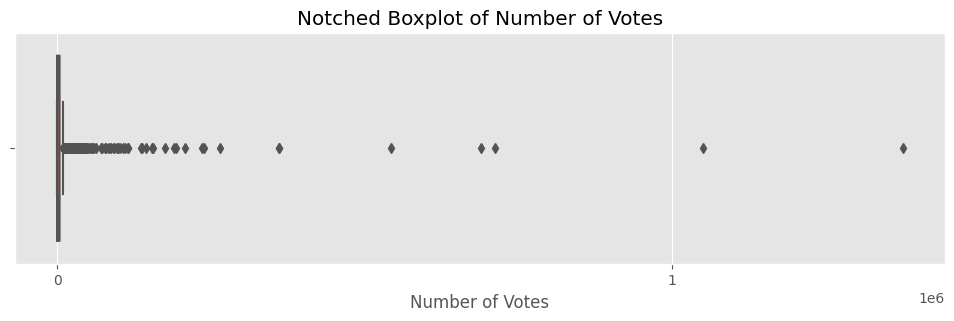

In [11]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12, 3))

sns.boxplot(x = 'numvotes', data = df, ax = ax, notch = True)
ax.set_xlabel('Number of Votes')
ax.xaxis.set_major_locator(plt.MultipleLocator(1000000))
ax.set_title('Notched Boxplot of Number of Votes')

<Axes: ylabel='Frequency'>

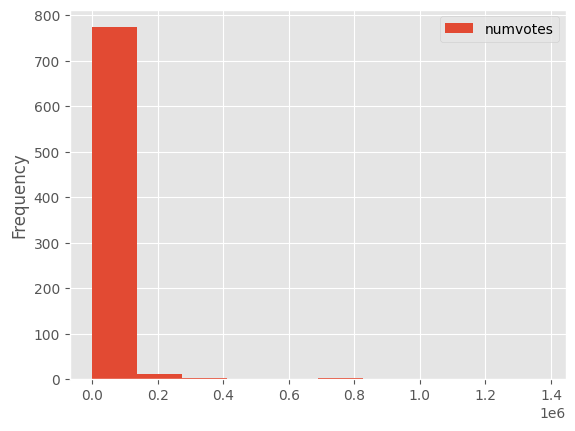

In [12]:
df[['numvotes']].plot(kind = 'hist', bins = 10)

In [25]:
connection.close()